In [72]:
%matplotlib inline
import mglearn.datasets
import mglearn.plot_helpers
import mglearn.plot_knn_classification
from preamble import *

Supervised Machine Learning Algorithms

Some Sample Datasets

X.shape: (26, 2)


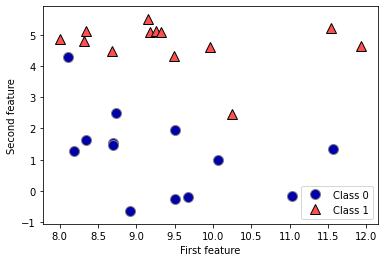

In [73]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.plot_helpers.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

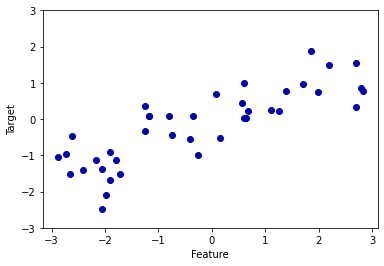

In [74]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Breast Cancer Dataset

In [75]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [76]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [77]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [78]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


Boston Dataset

In [79]:
from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys():\n", boston.keys())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [80]:
print("Shape of boston data:", boston.data.shape)

Shape of boston data: (506, 13)


In [81]:
print("Feature names:\n", boston.feature_names)

Feature names:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(array([5276.,  326.,   21.,  132.,  173.,  485.,   28.,    0.,    0.,
         137.]),
 array([  0. ,  71.1, 142.2, 213.3, 284.4, 355.5, 426.6, 497.7, 568.8,
        639.9, 711. ]),
 <BarContainer object of 10 artists>)

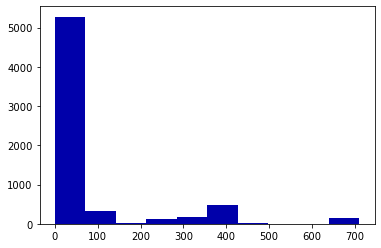

In [82]:
counts, bins = np.histogram(boston.data)
plt.hist(bins[:-1], bins, weights=counts)

In [83]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


k-Nearest Neighbors

k-Neighbors classification

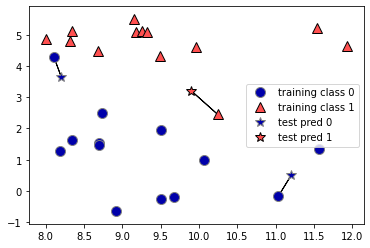

In [84]:
mglearn.plot_knn_classification.plot_knn_classification(n_neighbors=1)

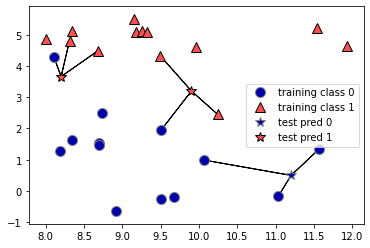

In [85]:
mglearn.plot_knn_classification.plot_knn_classification(n_neighbors=3)

In [86]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [88]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [90]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


Analyzing KNeighborsClassifier

AttributeError: module 'mglearn' has no attribute 'discrete_scatter'

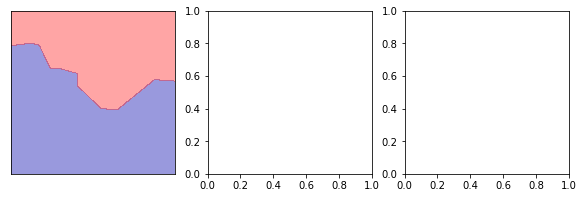

In [93]:
import mglearn.plots
import mglearn.plot_2d_separator
import mglearn.tools

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.tools.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)